## Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

    код, генерирующий выборки и графики;
    краткие описания каждого блока кода, объясняющие, что он делает;
    необходимые графики (убедитесь, что на них подписаны оси);
    выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
    выводы по результатам выполнения задания.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
from IPython.display import display, Math, Latex
%matplotlib inline

Для выполенения задания я решил взять Гамма-распределение с параметрами: k = 2, тета = 1

Следует сказать, что один из параметров второй параметр менять нельзя (он уже по умолчанию встроен в библиотеку Python'a и равен 1).

Ок. Давайте для начала сгенерируем выборку из 1000 элементов для Гамма-распределения, а затем построим гистограмму выборки и график плотности. Код для этого представлен ниже.

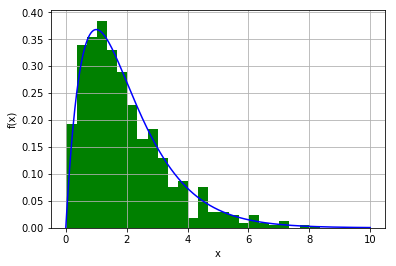

In [2]:
k = 2
gamma_dist = sts.gamma(k)

sample_data = gamma_dist.rvs(size=1000)

x = np.linspace(0, 10, 1000)
pdf = [gamma_dist.pdf(x_) for x_ in x]

plt.hist(sample_data, 25, normed=True, facecolor='green')
plt.plot(x, pdf, c="blue")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Замечательно. Давайте двигаться дальше. Выпишем формулы для вычисления параметров Гамма-распределения при заданных параметрах:

Матожидание: 2

Дисперсия: 2

Функция, вычисляющая данные параметры, представлена ниже.

In [3]:
def calculate_mu_and_sigma(k=2, theta=1):
    m = k * theta
    s = sqrt(k * (theta ** 2))
    return m, s

Следующая функция генерирует выборку средних, вычисляет теоретичские матожидание и стандартное отклонение, а затем строит гистограмму средних и нормального распределения, используя теоретические параметрами для математического ожидания и стандартного отклонения

In [4]:
def do_clt(sample, sub_sample_size, number_of_sample):
    sample_of_means = []
    for i in range(0, number_of_sample):
        sub_sample_indexes = np.random.randint(0, len(sample), sub_sample_size)
        sub_sample = sample[sub_sample_indexes]
        sample_of_means.append(np.mean(sub_sample))
    
    mu_n = np.mean(sample_of_means) # приближенное матожидание
    sigma_n = np.std(sample_of_means, ddof=1) # приближенное стандартное отклонение
    
    mu, sigma = calculate_mu_and_sigma(2)
    norm_dist = sts.norm(mu, sigma / sqrt(sub_sample_size))
    
    x = np.linspace(0, 10, 1000)
    pdf = [norm_dist.pdf(x_) for x_ in x]
    
    plt.hist(sample_of_means, 50, normed=True, facecolor='green',)
    plt.plot(x, pdf, c="blue")
    plt.grid(True)
    plt.xlabel("x")    
    plt.ylabel("f(x)")
    plt.axis([0, 4, 0, 2.5])
    return

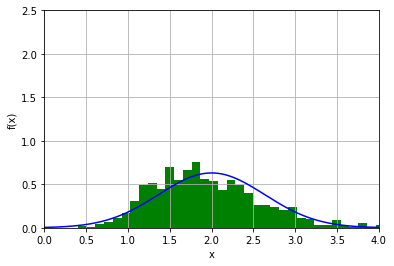

In [5]:
do_clt(sample_data, 5, 1000)

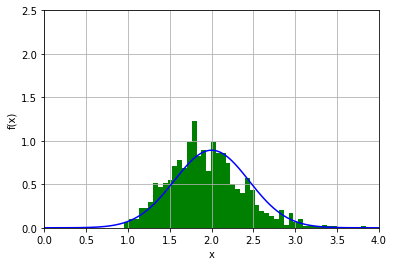

In [6]:
do_clt(sample_data, 10, 1000)

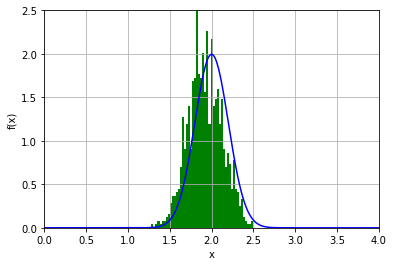

In [7]:
do_clt(sample_data, 50, 1000)

Из графиков видно, что центральная предельная теорема рабоетает. Даже при маленьком размере выбрки (n = 5) среднее приближается неплохо, а с увеличением "n" точность еще больше возрастает.